In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
Data = "/content/drive/MyDrive/AQI/Data/waqi_downloads"
Data_i = "/content/drive/MyDrive/AQI/Data/intermediate"


In [4]:
!curl --compressed -o $Data/waqi-covid-2020.csv   https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2020
!curl --compressed -o $Data/waqi-covid-2019Q1.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2019Q1
!curl --compressed -o $Data/waqi-covid-2019Q2.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2019Q2
!curl --compressed -o $Data/waqi-covid-2019Q3.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2019Q3
!curl --compressed -o $Data/waqi-covid-2019Q4.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2019Q4
!curl --compressed -o $Data/waqi-covid-2018H1.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2018H1
!curl --compressed -o $Data/waqi-covid-2017H1.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2017H1
!curl --compressed -o $Data/waqi-covid-2016H1.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2016H1
!curl --compressed -o $Data/waqi-covid-2015H1.csv https://aqicn.org/data-platform/covid19/report/27510-bd565c00/2015H1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104M  100  104M    0     0  12.9M      0  0:00:08  0:00:08 --:--:-- 15.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.2M  100 25.2M    0     0  8616k      0  0:00:03  0:00:03 --:--:-- 8616k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26.9M  100 26.9M    0     0  9165k      0  0:00:03  0:00:03 --:--:-- 9165k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.0M  100 30.0M    0     0  8985k      0  0:00:03  0:00:03 --:--:-- 8983k
  % Total    % Received % Xferd  Average Speed   Tim

# WAQI Data Prep

This notebook merges the historical air quality measurements available from https://aqicn.org/data-platform/covid19/ into a single file. It also adds coordinates based on the 

In [6]:
# Check that the files are present
!ls $Data/*.csv

/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2015H1.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2016H1.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2017H1.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2018H1.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2019Q1.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2019Q2.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2019Q3.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2019Q4.csv
/content/drive/MyDrive/AQI/Data/waqi_downloads/waqi-covid-2020.csv


In [10]:
import pandas as pd
import glob

csvs = glob.glob(f"{Data}/*.csv")
df = pd.concat([pd.read_csv(csv, skiprows=4) for csv in csvs])
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2021-02-08,GR,Thessaloníki,pm25,46,25.0,139.0,72.0,10312.30
1,2021-02-15,GR,Thessaloníki,pm25,24,21.0,65.0,38.0,1506.94
2,2021-06-29,GR,Thessaloníki,pm25,48,38.0,82.0,59.0,1116.45
3,2021-07-03,GR,Thessaloníki,pm25,48,21.0,70.0,46.0,1698.40
4,2021-08-02,GR,Thessaloníki,pm25,48,59.0,117.0,78.0,2591.06


In [12]:
#select only pm2.5 pollutants ad save
df=df[['Date','Country','City','median']].loc[df['Specie']=='pm25']
df.rename(columns={'median':'Median_PM25'},inplace=True)
df.to_csv(f"{Data_i}/waqi_pm25.csv", index=False)

### Adding locations

The dataset used is linked in the same page (https://aqicn.org/data-platform/covid19/) and contains locations fo rthe different cities.

In [13]:
# Download the file
!curl --compressed -o $Data/airquality-covid19-cities.json https://aqicn.org/data-platform/covid19/airquality-covid19-cities.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  124k    0  124k    0     0   116k      0 --:--:--  0:00:01 --:--:--  116k


In [14]:
# Load the city info
import json
cities = json.load(open(f"{Data}/airquality-covid19-cities.json", 'r'))
cities['data'][0] # An example

{'Place': {'country': 'GR',
  'feature': 'PPLA',
  'geo': [40.64361, 22.93086],
  'name': 'Thessaloníki',
  'pop': 354290},
 'Sources': [{'logo': '',
   'name': 'Citizen Weather Observer Program (CWOP/APRS)',
   'pols': ['weather'],
   'url': 'http://wxqa.com/'},
  {'logo': 'Greece.ypeka.png',
   'name': 'ΥΠΟΥΡΓΕΙΟ ΠΕΡΙΒΑΛΛΟΝΤΟΣ ΚΑΙ ΕΝΕΡΓΕΙΑΣ - Greek Ministry of Environment and Energy',
   'pols': None,
   'url': 'http://www.ypeka.gr'},
  {'logo': 'Europe-EEA.png',
   'name': 'European Environment Agency',
   'pols': None,
   'url': 'http://www.eea.europa.eu/themes/air/'}],
 'Stations': [{'Name': 'Agia Sofia, Greece'}, {'Name': 'Panorama, Greece'}]}

In [15]:
# Find and store the locations of all the cities in our dataset
city_locations = {}
for city in df.City.unique():
    data = next((item for item in cities['data'] if item["Place"]['name'] == city), None)
    if data == None:
        print('Error on:', city)
    else:
        city_locations[city] = data['Place']['geo']

Error on: Washington D.C.


In [16]:
# Manual Fix for DC
data = next((item for item in cities['data'] if 'Washington' in item["Place"]['name']), None)
city_locations['Washington D.C.'] = data['Place']['geo']

In [17]:
# Add to our dataframe
df['Lat'] = df['City'].map(lambda x: city_locations[x][0])
df['Long'] = df['City'].map(lambda x: city_locations[x][1])
df.to_csv(f"{Data_i}/citypm25.csv",index=False)
df.head()

,Date,Country,City,Median_PM25,Lat,Long
0,2021-02-08,GR,Thessaloníki,72.0,40.64361,22.93086
1,2021-02-15,GR,Thessaloníki,38.0,40.64361,22.93086
2,2021-06-29,GR,Thessaloníki,59.0,40.64361,22.93086
3,2021-07-03,GR,Thessaloníki,46.0,40.64361,22.93086
4,2021-08-02,GR,Thessaloníki,78.0,40.64361,22.93086


In [18]:
# Check 1 - make sure there aren't missing values
df.isna().sum()

Date           0
Country        0
City           0
Median_PM25    0
Lat            0
Long           0
dtype: int64

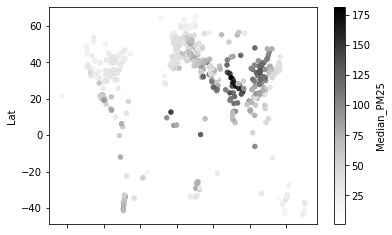

In [19]:
# Check 2 - look at the map
df.groupby('City').mean().plot(x='Long', y='Lat', kind='scatter', c='Median_PM25')

Looking good. We'll use ../Data/intermediate/citypm25.csv in future notebooks.